# Bootstrap Analysis

Bootstrap analysis using data measurement of speed of light from Michelson Morley in 1880s. You can download the dataset in here.
https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data = pd.read_csv('morley.csv')
#this speed data was substracted by 299000
data.Speed = data.Speed + 299000
data.head()

,Unnamed: 0,Expt,Run,Speed
0,1,1,1,299850
1,2,1,2,299740
2,3,1,3,299900
3,4,1,4,300070
4,5,1,5,299930


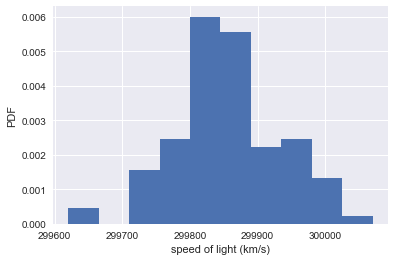

In [36]:
sns.set()
_ = plt.hist(data.Speed, density=True)
_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('PDF')
plt.show()

In [37]:
#function to calcuate the function needed for the resample
#data
def bootstrap_replicate_id(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [38]:
#initialize empty array
bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_id(
                        data.Speed, np.mean)

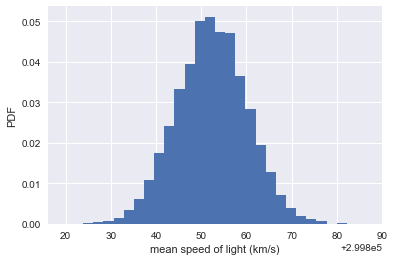

In [39]:
_ = plt.hist(bs_replicates, bins=30, density=True)
_ = plt.xlabel('mean speed of light (km/s)')
_ = plt.ylabel('PDF')
plt.show()

We will get 95% confidence interval from it by using percentile from 2.5% until 97.5%. It means we believe that the value of speed of light lies between this value with 95% confidence.

In [40]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print(conf_int)

[ 299837.      299867.5025]
